# Compare the three matching mechanisms
---
Compare the three matching mechanisms.  

    1. BOS (list length is three)
    2. SOSM (list length is two) + Additional BOS (list length is one)
    3. SOSM (list length is three)

## 1) Features 
Before comparing the two mechanisms, a summary of them is described below.  

In [1]:
%matplotlib inline
import matchfuncs as mf

In [2]:
prop_num = 5
resp_num = 3
prop_prefs = [
    [2, 0, 1],
    [2, 1, 0],
    [1, 2, 0],
    [1, 2, 0],
    [1, 2, 0]
]
resp_prefs = [
    [4, 3, 1, 2, 0],
    [1, 0, 4, 3, 2],
    [1, 3, 0, 2, 4]
]
prop_caps = [1, 3, 2, 2, 1]
resp_caps = [2, 2, 4]
list_length = 3

### 1.1) BOS

prop_matched = [2 3 0 2 0 2 2 1 1]
resp_matched = [2 1 3 4 3 2 1 0]
prop_indptr = [0 1 4 6 8 9]
resp_indptr = [0 2 4 8]


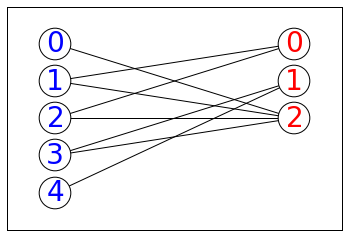

In [3]:
prop_matched, resp_matched, prop_indptr, resp_indptr = mf.BOS(prop_prefs, resp_prefs, resp_caps, prop_caps, list_length)
print('prop_matched = ' + str(prop_matched))
print('resp_matched = ' + str(resp_matched))
print('prop_indptr = ' + str(prop_indptr))
print('resp_indptr = ' + str(resp_indptr))
mf.Graph(prop_matched, resp_matched, prop_indptr, resp_indptr)

### 1.2) SOSM + AddBOS

prop_matched = [2 0 1 2 3 2 0 2 1]
resp_matched = [1 3 1 4 3 2 1 0]
prop_indptr = [0 1 4 6 8 9]
resp_indptr = [0 2 4 8]


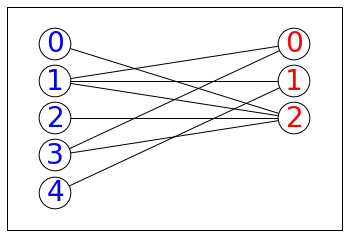

In [4]:
prop_matched, resp_matched, prop_indptr, resp_indptr = mf.DA(prop_prefs, resp_prefs, resp_caps, prop_caps, list_length-1)
prop_matched, resp_matched, prop_indptr, resp_indptr = mf.AddBOS(prop_prefs, resp_prefs, prop_matched, resp_matched, resp_caps, prop_caps)
print('prop_matched = ' + str(prop_matched))
print('resp_matched = ' + str(resp_matched))
print('prop_indptr = ' + str(prop_indptr))
print('resp_indptr = ' + str(resp_indptr))
mf.Graph(prop_matched, resp_matched, prop_indptr, resp_indptr)

### 1.3) SOSM

prop_matched = [2 0 1 2 3 2 0 2 1]
resp_matched = [1 3 1 4 3 2 1 0]
prop_indptr = [0 1 4 6 8 9]
resp_indptr = [0 2 4 8]


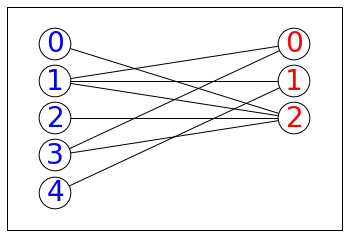

In [5]:
prop_matched, resp_matched, prop_indptr, resp_indptr = mf.DA(prop_prefs, resp_prefs, resp_caps, prop_caps, list_length)
print('prop_matched = ' + str(prop_matched))
print('resp_matched = ' + str(resp_matched))
print('prop_indptr = ' + str(prop_indptr))
print('resp_indptr = ' + str(resp_indptr))
mf.Graph(prop_matched, resp_matched, prop_indptr, resp_indptr)

## 2) Comparison
**Evaluate Axis** is below;  
    1. Stability  
    2. Truth-telling  
    3. Efficiency  
    4. Fairness  
    5. Feasibility  

### 2.1) truth-telling circumstances

The result is  

|| BOS | DAAdd | DA |
|:-----:|:-----------:|:------------:|:------------:|
|**Stability**| 1 | 0 | 0 |
|**Truth-telling**| 5 | 5 | 5 |
|**Efficiency**| 0.733, 2.167 | 0.9, 1.333 | 0.9, 1.333|
|**Fairness**| 0, 0 | 0, 0 | 0, 0|
|**Feasibility**| 9 | 13 | 15|


In [6]:
# BOS
mf.Comp('BOS', prop_prefs, resp_prefs, resp_caps, prop_caps, list_length)

(1.0, 5.0, 0.733, 2.167, 0.0, 0.0, 9.0)

In [7]:
# DAAdd
mf.Comp('DAAdd', prop_prefs, resp_prefs, resp_caps, prop_caps, list_length)

(0.0, 5.0, 0.9, 1.333, 0.0, 0.0, 13.0)

In [8]:
# DA
mf.Comp('DA', prop_prefs, resp_prefs, resp_caps, prop_caps, list_length)

(0.0, 5.0, 0.9, 1.333, 0.0, 0.0, 15.0)

### 2.2) Nash Equilibria

The result is  

|| BOS | DAAdd | DA |
|:-----:|:-----------:|:------------:|:------------:|
|**Nash**| 2774  | 3136   | 3672  |
|**Stability**| 1.283  | 0.782 | 0.16  |
|**Truth-telling**| 1.113  | 1.083 | 1.02  |
|**Efficiency**| 0.772, 1.889  | 0.816, 1.626   | 0.955, 1.333|
|**Fairness**| 0.0, 0.544  | 0.0, 0.25   | 0.02, 0.0|
|**Feasibility**| 8.686  | 12.319   | 15.0|


In [9]:
# BOS
mf.NashComp('BOS', prop_prefs, resp_prefs, resp_caps, prop_caps, list_length)

(2774, 1.283, 1.113, 0.772, 1.889, 0.0, 0.544, 8.686)

In [10]:
# DAAdd
mf.NashComp('DAAdd', prop_prefs, resp_prefs, resp_caps, prop_caps, list_length)

(3136, 0.782, 1.083, 0.816, 1.626, 0.0, 0.25, 12.319)

In [11]:
# DA
mf.NashComp('DA', prop_prefs, resp_prefs, resp_caps, prop_caps, list_length)

(3672, 0.16, 1.02, 0.955, 1.333, 0.02, 0.0, 15.0)

### 2.3) Common-Value Model

Utility Function for the i-th student is given as follows.  

$U_{i} = \alpha CV_{j} + (1-\alpha) PV_{ij}$  

$CV_{j}$ means a common value to the j-th seminar. (popularity etc.)  
$PV_{ij}$ means the i-th student's private value to the j-th seminar.   
These are uniformly distributed over [0, 1), and the lower j is, the higher CV is.  
$\alpha$ is a parameter, default set is 0.3.

Utility Function for the j-th seminar is given as follows.

$U_{j} = \beta CV_{i} + (1-\beta) PV_{ji}$  

$CV_{i}$ means a common value to the i-th student. (grade etc.)  
$PV_{ji}$ means the j-th seminar's private value to the i-th student.   
These are uniformly distributed over [0, 1), and the lower i is, the higher CV is.  
$\beta$ is a parameter, default set is also 0.3.

Suppose that the preferences of the students and seminars are decided by these utility functions,   
and the number of students is 345, that of seminars is 38.  
Half of the seminars have capacity 6, while the other half have capacity 13.  
All students have 2 capacity.

In [12]:
prop_num = 345
resp_num = 38
alpha = 0.3
beta = 0.3
prop_caps = [2 for i in range(prop_num)]
resp_caps = []
for i in range(19):
    resp_caps.append(6)
    resp_caps.append(13)
list_length = 3

In [13]:
prop_prefs, resp_prefs = mf.MakeCVprefs(prop_num, resp_num, alpha, beta)

In [14]:
print('prop_prefs =')
print(prop_prefs)
print('\nresp_prefs = ')
print(resp_prefs)
print('\nprop_caps = ')
print(prop_caps)
print('\nresp_caps = ')
print(resp_caps)

prop_prefs =
[[ 6  5  2 ..., 25 22 28]
 [ 2  6 28 ..., 34 22 36]
 [ 2 17 23 ..., 22 33 34]
 ..., 
 [ 5  9 16 ..., 29 30 28]
 [ 0  2 24 ..., 27 28 30]
 [ 8 21  5 ..., 13 34 27]]

resp_prefs = 
[[  8  36  21 ..., 326 332 341]
 [ 24   2  40 ..., 299 339 319]
 [  4   3  17 ..., 342 324 335]
 ..., 
 [ 16  43  51 ..., 313 341 328]
 [ 40  28  45 ..., 344 328 318]
 [ 13  24  21 ..., 343 297 303]]

prop_caps = 
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [15]:
result1 = mf.Comp('BOS', prop_prefs, resp_prefs, resp_caps, prop_caps, list_length)
result2 = mf.Comp('DAAdd', prop_prefs, resp_prefs, resp_caps, prop_caps, list_length)
result3 = mf.Comp('DAAdd', prop_prefs, resp_prefs, resp_caps, prop_caps, list_length)

In [16]:
print('Justified Envy')
print('1: %s \n2: %s \n3: %s' % (result1[0], result2[0], result3[0]))
print('Truth-telling')
print('1: %s \n2: %s \n3: %s' % (result1[1], result2[1], result3[1]))
print('Efficiency of the students')
print('1: %s \n2: %s \n3: %s' % (result1[2], result2[2], result3[2]))
print('Efficiency of the seminars')
print('1: %s \n2: %s \n3: %s' % (result1[3], result2[3], result3[3]))
print('None Zemi')
print('1: %s \n2: %s \n3: %s' % (result1[4], result2[4], result3[4]))
print('Vacant Caps')
print('1: %s \n2: %s \n3: %s' % (result1[5], result2[5], result3[5]))
print('Interviews')
print('1: %s \n2: %s \n3: %s' % (result1[6], result2[6], result3[6]))

Justified Envy
1: 311.0 
2: 286.0 
3: 286.0
Truth-telling
1: 345.0 
2: 345.0 
3: 345.0
Efficiency of the students
1: 21.387 
2: 21.494 
3: 21.494
Efficiency of the seminars
1: 151.282 
2: 118.446 
3: 118.446
None Zemi
1: 108.0 
2: 118.0 
3: 118.0
Vacant Caps
1: 37.0 
2: 41.0 
3: 41.0
Interviews
1: 991.0 
2: 998.0 
3: 998.0


In [ ]:
result1 = mf.NashComp('BOS', prop_prefs, resp_prefs, resp_caps, prop_caps, list_length)

In [ ]:
result2 = mf.NashComp('DAAdd', prop_prefs, resp_prefs, resp_caps, prop_caps, list_length)

In [ ]:
result3 = mf.NashComp('DAAdd', prop_prefs, resp_prefs, resp_caps, prop_caps, list_length)

In [ ]:
print('Nash')
print('1: %s \n2: %s \n3: %s' % (result1[0], result2[0], result3[0]))
print('Justified Envy')
print('1: %s \n2: %s \n3: %s' % (result1[1], result2[1], result3[1]))
print('Truth-telling')
print('1: %s \n2: %s \n3: %s' % (result1[2], result2[2], result3[2]))
print('Efficiency of the students')
print('1: %s \n2: %s \n3: %s' % (result1[3], result2[3], result3[3]))
print('Efficiency of the seminars')
print('1: %s \n2: %s \n3: %s' % (result1[4], result2[4], result3[4]))
print('None Zemi')
print('1: %s \n2: %s \n3: %s' % (result1[5], result2[5], result3[5]))
print('Vacant Caps')
print('1: %s \n2: %s \n3: %s' % (result1[6], result2[6], result3[6]))
print('Interviews')
print('1: %s \n2: %s \n3: %s' % (result1[7], result2[7], result3[7]))